In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib import patches
import numpy as np
import radar_utils

# WEDGES

In [2]:
def __plot_wedges(ax, radar_color, wedge_color, alpha=None, compare=False):
        """
        Function to plot concentric circles.

        Args:
            ax (axes.Axes): axis object.
            radar_color (list): color values.
            vertices (list): coordinate values for each vertex of the polygon.
            alpha (list, optional): alpha values for colors. Defaults to None.
            compare (bool, optional): True, if a comparison chart is to be made. Defaults to False.

        Returns:
            axes.Axes: axis object.
        """        

        ## radius value for each circle
        radii = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

        ## linewidth, zorder for circle
        lw_circle, zorder_circle =  20, 2
        
        if compare:    ## for making comparison radar charts
                ## plot a polygon
                radar_1 = Polygon(vertices, fc=radar_color, zorder=zorder_circle, alpha=alpha)
                ax.add_patch(radar_1)
        else:
                ## plot a polygon
                radar_1 =  Polygon(vertices, fc='pink', zorder=zorder_circle) # -1 
                ax.add_patch(radar_1)
               
        ## create concentric circles 
        for rad in radii:
            if rad % 2 ==1:
                ## create circle
                wedge1 = patches.Wedge((0, 0), r=rad+1, theta1=0, theta2=360, width=1, color=wedge_color[0], zorder=zorder_circle)
                ax.add_patch(wedge1)
                # for radar area
                wedge1_radar = patches.Wedge((0, 0), r=rad+1, theta1=0, theta2=360, width=1, color=radar_color[0], zorder=zorder_circle+1)
                wedge1_radar.set_clip_path(radar_1)
                ax.add_patch(wedge1_radar)

            else:
            #if compare == False:
                ## create another circle to fill in second color
                wedge2 = patches.Wedge(center=(0, 0), r=rad+1, theta1 = 0, theta2= 360, width = 1, color=wedge_color[1], zorder=zorder_circle)
                ax.add_patch(wedge2)
                
                wedge2_radar = patches.Wedge(center=(0, 0), r=rad+1, theta1 = 0, theta2= 360, width = 1, color=radar_color[1], zorder=zorder_circle+1)
                wedge2_radar.set_clip_path(radar_1)
                ax.add_patch(wedge2_radar)

        
        return ax

# LABELS

In [3]:
## get coordinates and rotation values for labels/values at a certain radius!
## plot the labels/values

def __add_labels(params, ax, return_list=False, radius=12, range_val=False, flip_labels = True, fontsize=8):
    
    coord = radar_utils.get_label_coordinates(n=len(params))
    # array with x and y coordinate relative to radius and the rotation in radians
    
    if return_list:
         x_y = []

    for i, p in enumerate(params):
        rot = coord[i, 2] # = alpha = rotation value for parameter in radians
        x, y = (radius *np.cos(rot), radius*np.sin(rot)) # coordinates x and y bases on rotation and radius

        if return_list == True:
            # collect coordinates in a list of tuples
            # number of parameters * tuples of size 2
            x_y.append((x, y))
        
        # adding 180° if y < 0 => on its head
        if y < 0 and flip_labels:
            rot += np.pi
        
        # if parameters is numeric (i.e. value instead if label) round
        if type(p) == np.float64:
            p = round(p, 2)
        else:
            pass

        # add text to ax
        ax.text(x, y, p, rotation=np.rad2deg(rot)-90, ha='center', va='center', 
            fontsize=fontsize, fontdict=dict(color='white')) #fontfamily=self.fontfamily, fontdict=dict(color=color)

    if return_list:
        return ax, x_y
    else:
        return ax

# Ranges

In [4]:
def __add_ranges(ranges, ax):

    x_y = []
    range_values = np.array([])

    # looping over list of touples of min and max for each param
    # get num values evenly spread from min to max
    for rng in ranges:
        value = np.linspace(start=rng[0], stop=rng[1], num=11)
        range_values = np.append(range_values, value)
    
    # reshape to number of params (rows) * num values (columns)
    range_values = range_values.reshape((len(ranges),11))

    # loop over radius
    for i, r in enumerate(radii):
        
        # get the value of each parameter that belongs to this radius
        params = range_values[:, i]

        # for these values and this radius create the labels
        # get both the ax and the coordinates of the value labels
        ax, xy = __add_labels(params=params, ax=ax, return_list=True, radius=r+1, range_val=True)
        x_y.append(xy)

    return ax, np.array(x_y), range_values

# Overall

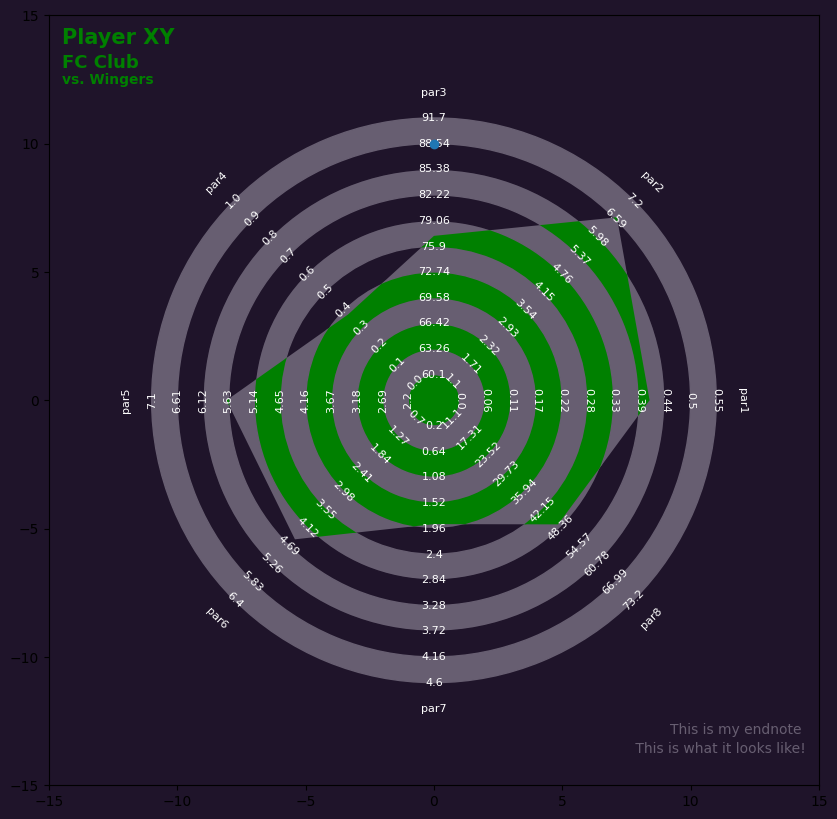

In [5]:
title = 'Player XY'
title_size=15
title_color='green'

subtitle = 'FC Club'
subtitle_size=13
subtitle_color='green'

position_subtitle = 'vs. Wingers'
position_subtitle_size=10
position_subtitle_color='green'

endnote= 'This is my endnote \n This is what it looks like!'
end_color='#675E71'
end_size=10
compare = False
background_col='#1f142a'
wedge_colors = ['#1f142a', '#675E71']
radar_color=['#675E71', 'green']
#patch_color = 'pink'
fig, ax = plt.subplots(figsize=(20, 10), facecolor=background_col)
ax.set_facecolor(background_col)
## set axis
ax.set_aspect('equal')
ax.set(xlim=(-15, 15), ylim=(-15, 15))
params = ['par1', 'par2', 'par3', 'par4', 'par5', 'par6', 'par7', 'par8']
return_list=False
ranges = [(0.0, 0.55), (1.1, 7.2), (60.1, 91.7), (0.0, 1), (2.2, 7.1), (0.7, 6.4), (0.2, 4.6), (11.1, 73.2)]
radius = 10
radii = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
values = [0.42, 6.69, 78.5, 0.43, 5.8, 4.67, 2.13, 49.7]

rot = radar_utils.get_label_coordinates(n=len(params))[:, 2]
vertices = radar_utils.get_radar_coord(values=values, radius=radius, ranges=ranges, rot=rot)

## make the radar chart
ax = __plot_wedges(ax=ax, compare=compare, radar_color=radar_color, wedge_color=wedge_colors)
ax.scatter(0,10, zorder=10)
ax = __add_labels(ax=ax, params=params, return_list=return_list)
ax, xy, range_values = __add_ranges(ranges=ranges, ax=ax,)
#print(__add_ranges(ranges=ranges, ax=ax))
if endnote:
    y_end = -13
    for note in endnote.split('\n'):
        ax.text(14.5, y_end, note, ha='right', fontdict={"color": end_color}, fontsize=end_size)
        y_end -= 0.75

if title:
    ax.text(-14.5, 14.5, title, ha='left', va='top',fontdict={"color": title_color}, fontsize=title_size, fontweight='bold')
if subtitle:
    ax.text(-14.5, 13.5, subtitle, ha='left', va='top',fontdict={"color": subtitle_color}, fontsize=subtitle_size, fontweight='bold')
if position_subtitle:
    ax.text(-14.5, 12.75, position_subtitle, ha='left', va='top',fontdict={"color": position_subtitle_color}, fontsize=position_subtitle_size, fontweight='bold')
    

In [6]:
vertices

[[8.399999999999999, 0.0],
 [7.127868192649313, 7.127868192649313],
 [3.9219701289149405e-16, 6.405063291139239],
 [-3.3446150750123693, 3.3446150750123698],
 [-8.081632653061225, 9.897145560456162e-16],
 [-5.417430374459041, -5.417430374459039],
 [-8.863381208828968e-16, -4.825],
 [4.834742983765024, -4.834742983765026]]

# Endnote

# Titles

In [ ]:
fig, ax = plt.subplots()
patch = patches.Circle((0.5, 0.5), radius=0.25)
ax.add_patch(patch)
patch2= patches.Rectangle((0.5, 0.5), height=0.5, width=0.5, color='red', alpha=0.5)
ax.add_patch(patch2)
patch.set_clip_path(patch2)


In [ ]:
fig, ax = plt.subplots(figsize=(20, 10), facecolor='white')
ax.add_patch(patches.Rectangle((0.5, 0.5), height=0.5, width=0.5, color='red', alpha=1, fill=False, linewidth=10))

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10), facecolor='white')
ax.set(xlim=(0., 1.0), ylim=(0., 1.))
ax.add_patch(patches.Wedge((0.5, 0.5), 0.2, 0, 360, width=0.1, fc='red'))
ax.add_patch(patches.Wedge((0.5, 0.5), 0.4, 0, 360, width=0.1))